### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import balanced_accuracy_score, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import plot_tree
from sklearn.svm import SVC



from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings("ignore")

### Import Data

In [2]:
# !kaggle datasets download -d yeanzc/telco-customer-churn-ibm-dataset

In [3]:
data = pd.read_excel('Telco_customer_churn.xlsx')

In [4]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### Data preprocessing and Cleaning

In [5]:
# remove unwanted columns
drop_cols = ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
             'Longitude', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']

data.drop(columns = drop_cols, inplace=True)

data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


In [6]:
# replace the whitespaces with underscores in the data and columns
data.replace(' ', '_', regex=True, inplace=True)

data.columns = data.columns.str.replace(' ', '_')

data.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
1,Female,No,No,Yes,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes
2,Female,No,No,Yes,8,Yes,Yes,Fiber_optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.5,Yes
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber_optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,Yes
4,Male,No,No,Yes,49,Yes,Yes,Fiber_optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.3,Yes


In [7]:
# check for null values
data.isnull().sum()

Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn_Label          0
dtype: int64

In [8]:
# check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior_Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure_Months      7043 non-null   int64  
 5   Phone_Service      7043 non-null   object 
 6   Multiple_Lines     7043 non-null   object 
 7   Internet_Service   7043 non-null   object 
 8   Online_Security    7043 non-null   object 
 9   Online_Backup      7043 non-null   object 
 10  Device_Protection  7043 non-null   object 
 11  Tech_Support       7043 non-null   object 
 12  Streaming_TV       7043 non-null   object 
 13  Streaming_Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless_Billing  7043 non-null   object 
 16  Payment_Method     7043 

In [9]:
#  replace '_' values for column Total_Charges with 0

data.loc[data['Total_Charges'] == '_']

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label
2234,Female,No,Yes,No,0,No,No_phone_service,DSL,Yes,No,Yes,Yes,Yes,No,Two_year,Yes,Bank_transfer_(automatic),52.55,_,No
2438,Male,No,No,No,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.25,_,No
2568,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two_year,No,Mailed_check,80.85,_,No
2667,Male,No,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.75,_,No
2856,Female,No,Yes,No,0,No,No_phone_service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two_year,No,Credit_card_(automatic),56.05,_,No
4331,Male,No,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,19.85,_,No
4687,Male,No,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.35,_,No
5104,Female,No,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.00,_,No
5719,Male,No,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,One_year,Yes,Mailed_check,19.70,_,No
6772,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two_year,No,Mailed_check,73.35,_,No


In [10]:
data.loc[(data['Total_Charges'] == '_'), 'Total_Charges'] =0

# convert the data type to numeric
data['Total_Charges'] = pd.to_numeric(data['Total_Charges'])

In [11]:
# verify the data type change for the 'Total_Charges' column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior_Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure_Months      7043 non-null   int64  
 5   Phone_Service      7043 non-null   object 
 6   Multiple_Lines     7043 non-null   object 
 7   Internet_Service   7043 non-null   object 
 8   Online_Security    7043 non-null   object 
 9   Online_Backup      7043 non-null   object 
 10  Device_Protection  7043 non-null   object 
 11  Tech_Support       7043 non-null   object 
 12  Streaming_TV       7043 non-null   object 
 13  Streaming_Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless_Billing  7043 non-null   object 
 16  Payment_Method     7043 

### Label Encoding

In [12]:
# encoding gender
data['Gender'] = data['Gender'].apply(lambda x: 0 if x=='Male' else 1)

# encoding "yes-no" columns
birnay_enc_cols = ['Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 
                   'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
                  'Streaming_TV', 'Streaming_Movies', 'Paperless_Billing', 'Churn_Label']

for col in birnay_enc_cols:
    data[col] = data[col].apply(lambda x: 0 if x == "No" else 1)

In [13]:
data_encoded = pd.get_dummies(data, columns = ['Internet_Service', 'Contract', 'Payment_Method'], drop_first=True)

data_encoded.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Online_Security,Online_Backup,Device_Protection,...,Monthly_Charges,Total_Charges,Churn_Label,Internet_Service_Fiber_optic,Internet_Service_No,Contract_One_year,Contract_Two_year,Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
1,1,0,0,1,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
2,1,0,0,1,8,1,1,0,0,1,...,99.65,820.50,1,1,0,0,0,0,1,0
3,1,0,1,1,28,1,1,0,0,1,...,104.80,3046.05,1,1,0,0,0,0,1,0
4,0,0,0,1,49,1,1,0,1,1,...,103.70,5036.30,1,1,0,0,0,0,0,0


<AxesSubplot: >

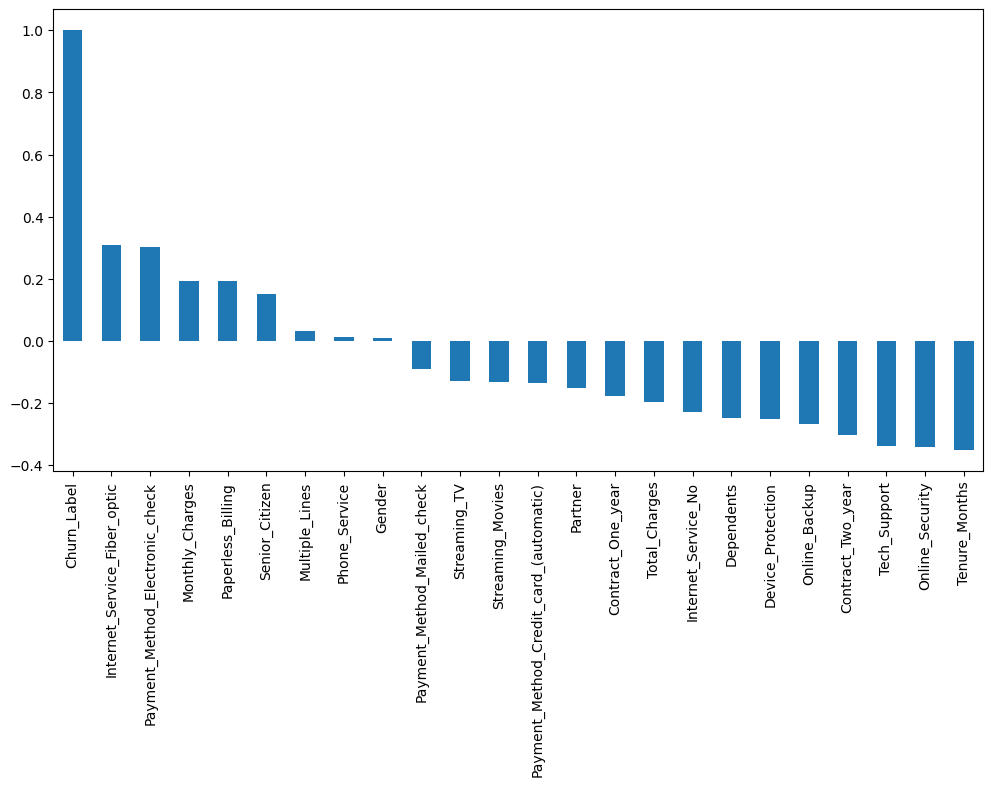

In [14]:
# Identify Top correlated features with Churn

plt.figure(figsize=(12,6))
data_encoded.corr()['Churn_Label'].sort_values(ascending = False).plot(kind='bar')

In [15]:
X = data_encoded.drop(columns = ['Churn_Label'])
y = data_encoded['Churn_Label']

In [16]:
X.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Online_Security,Online_Backup,Device_Protection,...,Paperless_Billing,Monthly_Charges,Total_Charges,Internet_Service_Fiber_optic,Internet_Service_No,Contract_One_year,Contract_Two_year,Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,0,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,0,0,0,0,0,0,1
1,1,0,0,1,2,1,0,0,0,0,...,1,70.70,151.65,1,0,0,0,0,1,0
2,1,0,0,1,8,1,1,0,0,1,...,1,99.65,820.50,1,0,0,0,0,1,0
3,1,0,1,1,28,1,1,0,0,1,...,1,104.80,3046.05,1,0,0,0,0,1,0
4,0,0,0,1,49,1,1,0,1,1,...,1,103.70,5036.30,1,0,0,0,0,0,0


In [17]:
from sklearn.feature_selection import SelectKBest

selection = SelectKBest(k=12)
X_select = selection.fit_transform(X,y)

In [18]:
X = X[X.columns[selection.get_support()]]

In [19]:
print(len(X.columns))

list(X.columns)

12


['Dependents',
 'Tenure_Months',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Monthly_Charges',
 'Total_Charges',
 'Internet_Service_Fiber_optic',
 'Internet_Service_No',
 'Contract_Two_year',
 'Payment_Method_Electronic_check']

# Modeling - Attempt 1

In [20]:
# perform stratified train-test split to maintain the class ratio
Models = []

print('Original Ratio: ', sum(y)/len(y))
      
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
      
print('Spit Ratio Train: ', sum(y_train)/len(y_train))
print('Spit Ratio test: ', sum(y_test)/len(y_test))

Original Ratio:  0.2653698707936959
Spit Ratio Train:  0.2654297614539947
Spit Ratio test:  0.26519023282226006


In [21]:
# function to print the evalaution metrics

def eval_metrics(model, X_test, y_test):
    y_pred_model = model.predict(X_test)    
    y_probabilities = model.predict_proba(X_test)[:,1]
    
    print('Precision: ', precision_score(y_test, y_pred_model))
    print('Recall: ', recall_score(y_test, y_pred_model))
    print('F1 Score: ', f1_score(y_test, y_pred_model))
    print('ROC AUC Score: ', roc_auc_score(y_test, y_probabilities))
    
    plt.figure(figsize=(12,6))
    
    #confusion matrix
    plt.subplot(121)
    conf_mat = confusion_matrix(y_test, y_pred_model)
    sns.heatmap(conf_mat, fmt = "d",annot=True)
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')

    #roc_auc_score
    model_roc_auc = roc_auc_score(y_test, y_probabilities) 
    fpr,tpr,thresholds = roc_curve(y_test, y_probabilities)
    
    plt.subplot(122)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.show()

## 1. Logistics Regression

In [22]:
churn_lr = LogisticRegression(random_state=42, max_iter=1000)

churn_lr.fit(X_train, y_train)
Models.append(churn_lr)

Precision:  0.6580310880829016
Recall:  0.5438972162740899
F1 Score:  0.5955451348182883
ROC AUC Score:  0.8490124077855628


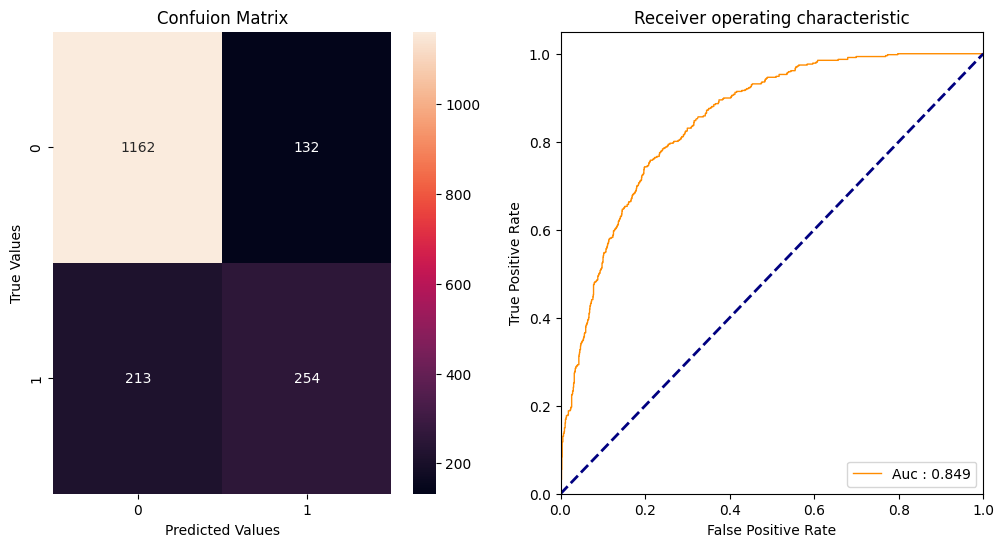

In [23]:
eval_metrics(churn_lr, X_test, y_test)

## 2. Gaussian Naive Bayes

In [24]:
churn_GNB = GaussianNB()

churn_GNB.fit(X_train, y_train)

Models.append(churn_GNB)

Precision:  0.4831168831168831
Recall:  0.7965738758029979
F1 Score:  0.6014551333872271
ROC AUC Score:  0.8322326070912033


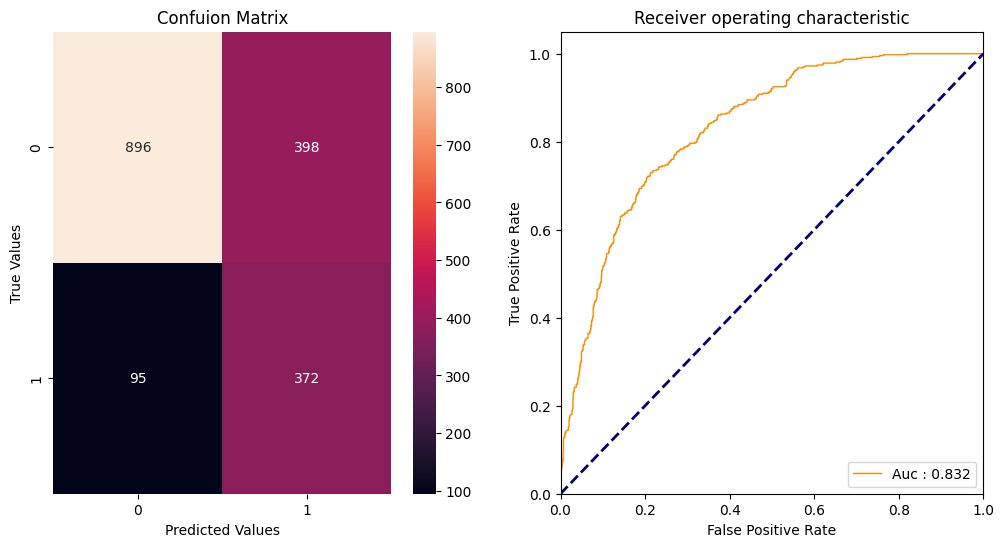

In [25]:
eval_metrics(churn_GNB, X_test, y_test)

## 3. Random Forest

In [26]:
churn_rf = RandomForestClassifier(random_state=42)

churn_rf.fit(X_train, y_train)
Models.append(churn_rf)

Precision:  0.6090425531914894
Recall:  0.49036402569593146
F1 Score:  0.5432977461447213
ROC AUC Score:  0.8065970762769362


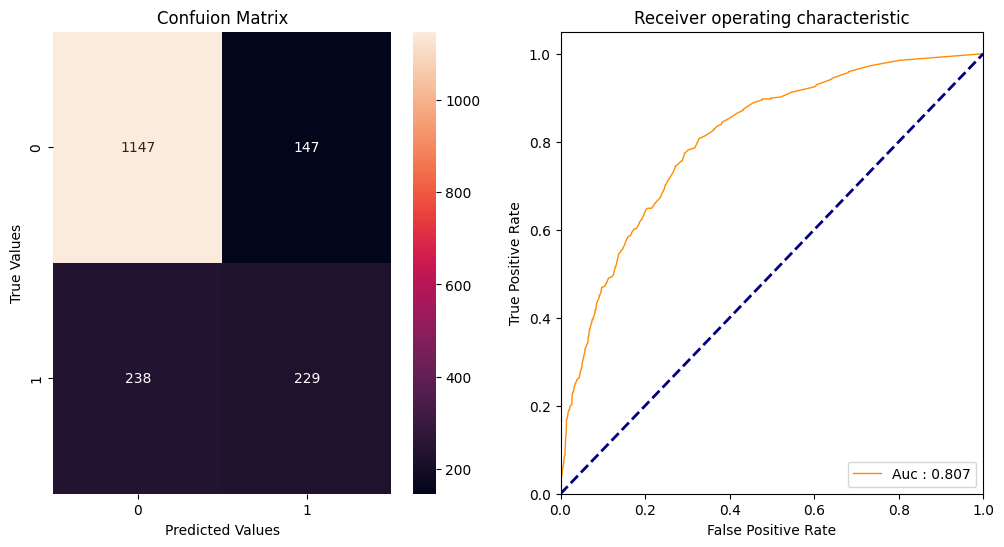

In [27]:
eval_metrics(churn_rf, X_test, y_test)

## 4. Gradient Boost

In [28]:
churn_gb = GradientBoostingClassifier(random_state=42)

churn_gb.fit(X_train, y_train)
Models.append(churn_gb)

Precision:  0.6470588235294118
Recall:  0.49464668094218417
F1 Score:  0.5606796116504854
ROC AUC Score:  0.8461983988032395


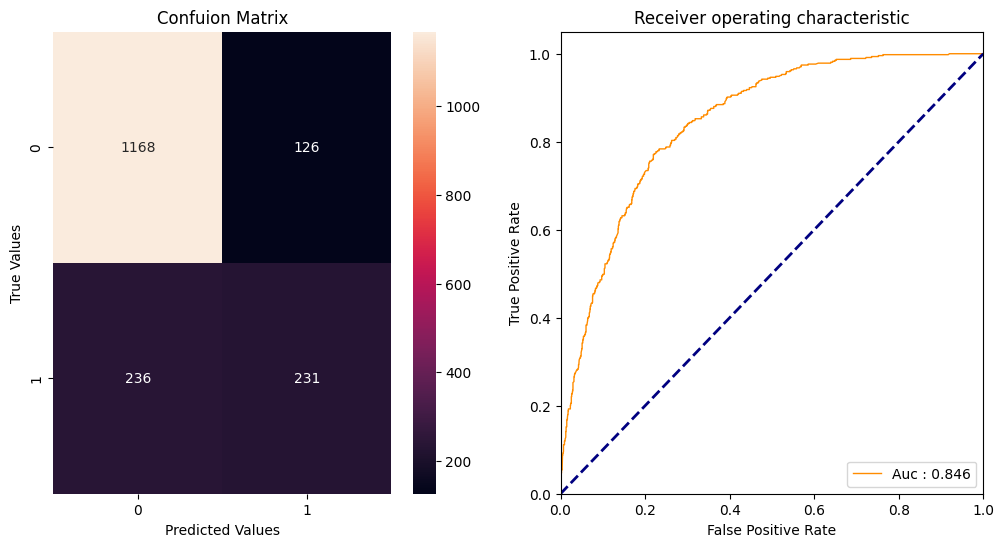

In [29]:
eval_metrics(churn_gb, X_test, y_test)

## 5. XGBoost

In [30]:
churn_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=42)

churn_xgb.fit(X_train, y_train)
Models.append(churn_xgb)

Precision:  0.6036269430051814
Recall:  0.4989293361884368
F1 Score:  0.5463071512309495
ROC AUC Score:  0.8221308030144067


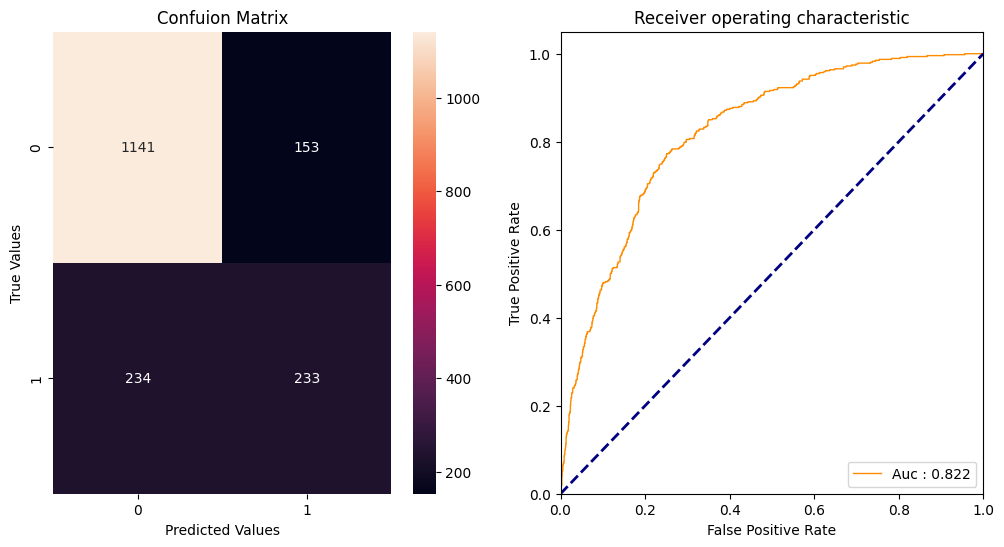

In [31]:
eval_metrics(churn_xgb, X_test, y_test)

## 6. Kernel SVM

In [32]:
churn_svm = SVC(random_state=42, probability=True)

churn_svm.fit(X_train, y_train)
Models.append(churn_svm)

Precision:  0.0
Recall:  0.0
F1 Score:  0.0
ROC AUC Score:  0.7952913959668905


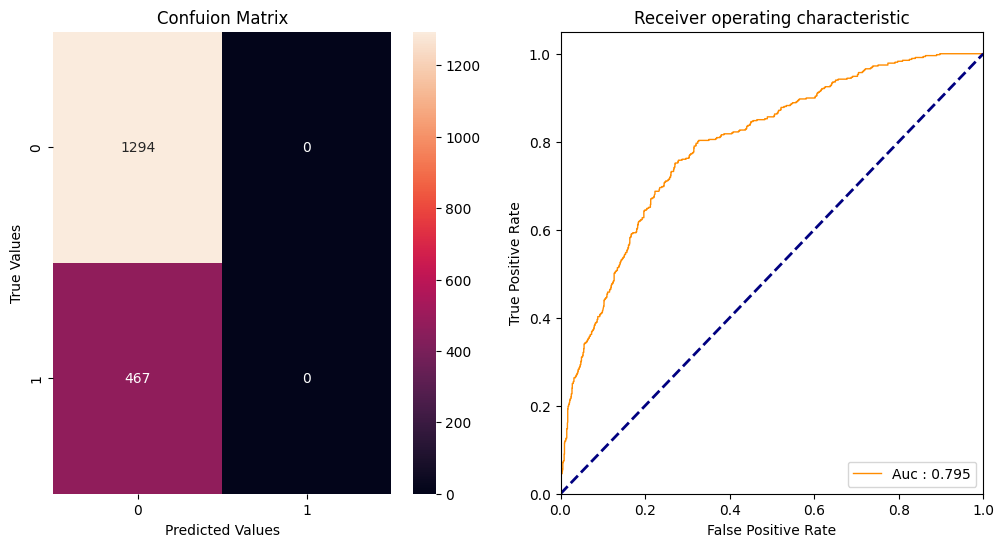

In [33]:
eval_metrics(churn_svm, X_test, y_test)

## Model Comparision using K-Fold Cross Validation

In [34]:
result_col = ["Algorithm", "AUC Mean","Bal Acc Mean", 'Recall']
model_results = pd.DataFrame(columns = result_col)

i=0

for model in Models:
    kfold = KFold(n_splits=10)
    
    cv_acc_results = cross_val_score(model, X_train, y_train, 
                    cv = kfold, scoring="balanced_accuracy")
    cv_auc_results = cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="roc_auc")
    cv_recall_results = cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="recall")
    
    model_results.loc[i] = [model.__class__.__name__, 
                           round(cv_auc_results.mean()*100,2),
                           round(cv_acc_results.mean()*100,2),
                           round(cv_recall_results.mean()*100,2)]
    i+=1

model_results.sort_values(by = ['AUC Mean'], ascending=False)

,Algorithm,AUC Mean,Bal Acc Mean,Recall
3,GradientBoostingClassifier,85.28,70.95,52.11
0,LogisticRegression,84.99,72.10,54.14
1,GaussianNB,83.69,75.85,81.74
4,XGBClassifier,83.67,70.50,53.46
2,RandomForestClassifier,82.15,69.59,51.00
5,SVC,78.88,50.00,0.00


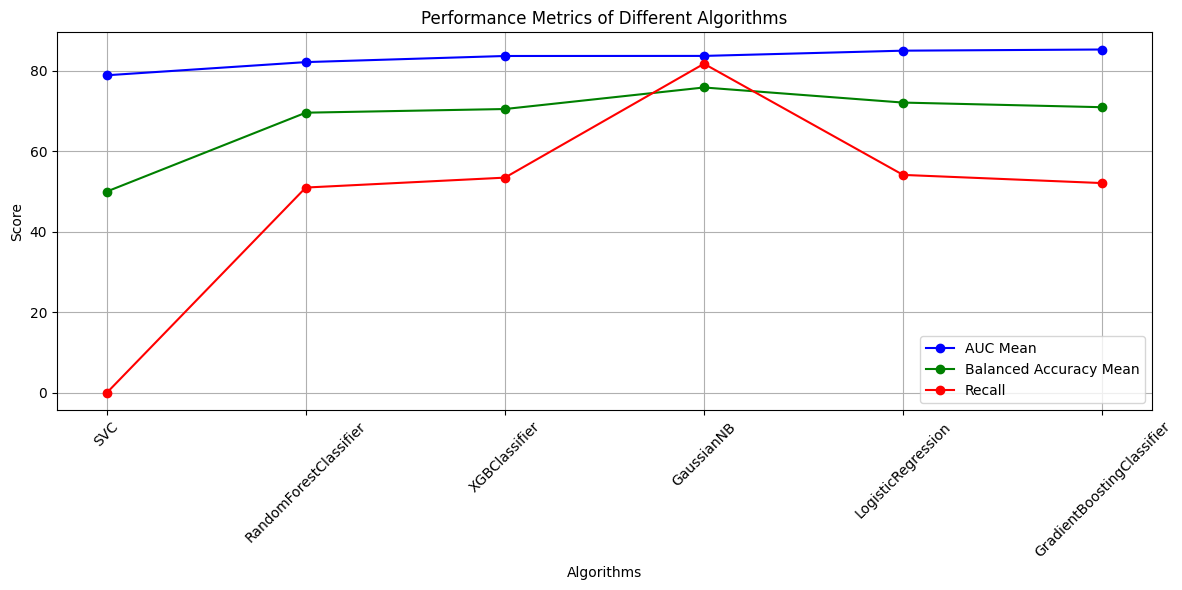

In [35]:
model_results = model_results.sort_values(by = ['AUC Mean'])

plt.figure(figsize=(12, 6))

plt.plot(model_results['Algorithm'], model_results['AUC Mean'], marker='o', label='AUC Mean', color='b')
plt.plot(model_results['Algorithm'], model_results['Bal Acc Mean'], marker='o', label='Balanced Accuracy Mean', color='g')
plt.plot(model_results['Algorithm'], model_results['Recall'], marker='o', label='Recall', color='r')

plt.xticks(rotation=45)
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Performance Metrics of Different Algorithms')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Modeling - Attempt 2

- Due to class imbalances, the results obtained are not so great even after trying complex models like XGBoost and SVM.

    The next approach will use following 2 things to improve the models
        1. SMOTEEN to over-sample and correct the class imbalances
        2. Hyperparamter tuning using grid search cv

In [58]:
st=SMOTEENN()
X_st,y_st = st.fit_resample(X, y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_st)))

The number of classes before fit Counter({0: 5174, 1: 1869})
The number of classes after fit Counter({1: 2985, 0: 2632})


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_st, y_st, random_state=42, stratify=y_st)

In [60]:
# function to perform gridsearchcv

def gridsearchcv(model, params, scoring):
    grid = GridSearchCV(estimator=model, param_grid=params, n_jobs=4, cv=5,verbose=1, scoring=scoring)
    grid.fit(X_train, y_train)
    
    return grid

### Fitting all models on new sampled data

In [61]:
Models_Sampled = []

Models_Sampled.append(LogisticRegression(random_state=42, max_iter=1000))
Models_Sampled.append(GaussianNB())
Models_Sampled.append(RandomForestClassifier(random_state=42))
Models_Sampled.append(GradientBoostingClassifier(random_state=42))
Models_Sampled.append(xgb.XGBClassifier(objective='binary:logistic', seed=42))
Models_Sampled.append(SVC(random_state=42, probability=True))

### Model Comparision using K-Fold Cross Validation

In [62]:
result_col = ["Algorithm", "AUC Mean","Bal Acc Mean", 'Recall']
model_results_sampled = pd.DataFrame(columns = result_col)

i=0

for model in Models_Sampled:
    kfold = KFold(n_splits=10)
    
    cv_acc_results = cross_val_score(model, X_train, y_train, 
                    cv = kfold, scoring="balanced_accuracy")
    cv_auc_results = cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="roc_auc")
    cv_recall_results = cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="recall")
    
    model_results_sampled.loc[i] = [model.__class__.__name__, 
                           round(cv_auc_results.mean()*100,2),
                           round(cv_acc_results.mean()*100,2),
                           round(cv_recall_results.mean()*100,2)]
    i+=1

model_results_sampled.sort_values(by = ['AUC Mean'], ascending=False)

,Algorithm,AUC Mean,Bal Acc Mean,Recall
2,RandomForestClassifier,98.96,94.90,95.97
4,XGBClassifier,98.87,95.12,96.09
3,GradientBoostingClassifier,98.81,94.93,96.11
0,LogisticRegression,98.24,93.03,93.86
1,GaussianNB,96.69,90.44,92.62
5,SVC,87.29,77.74,77.24


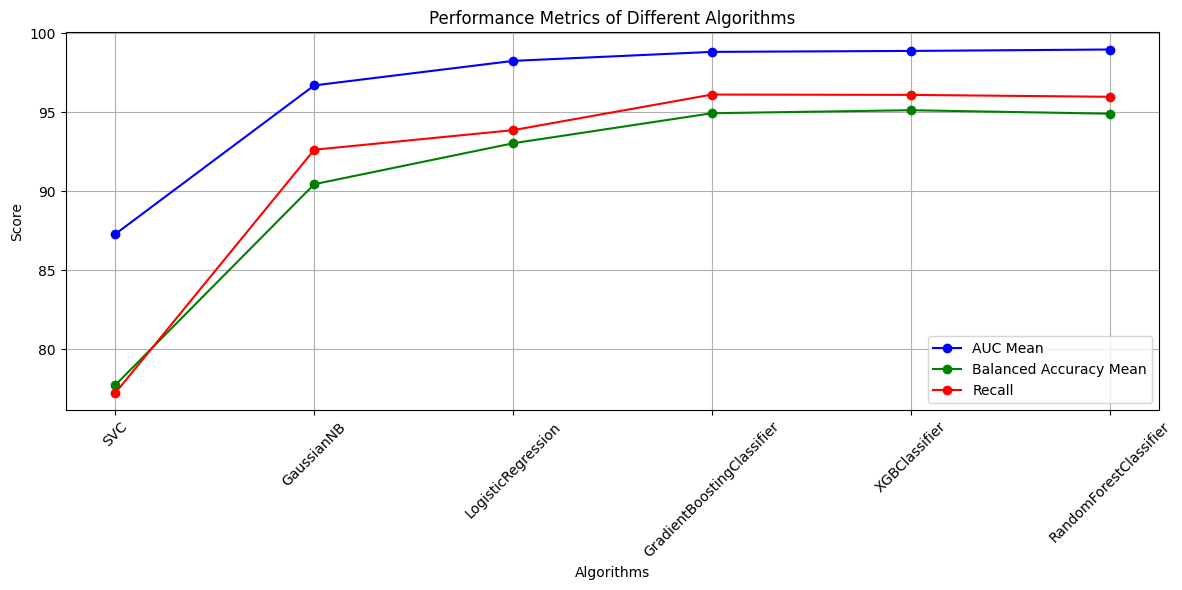

In [63]:
model_results_sampled = model_results_sampled.sort_values(by = ['AUC Mean'])

plt.figure(figsize=(12, 6))

plt.plot(model_results_sampled['Algorithm'], model_results_sampled['AUC Mean'], marker='o', label='AUC Mean', color='b')
plt.plot(model_results_sampled['Algorithm'], model_results_sampled['Bal Acc Mean'], marker='o', label='Balanced Accuracy Mean', color='g')
plt.plot(model_results_sampled['Algorithm'], model_results_sampled['Recall'], marker='o', label='Recall', color='r')

plt.xticks(rotation=45)
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Performance Metrics of Different Algorithms')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

## Hyperparameter tuning top 2 models

### Random Forest

In [64]:
rf_params_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [4, 5, 6, 7, 8],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample'],
    'ccp_alpha': [0.001, 0.01, 0.1]
}

rf_grid = gridsearchcv(churn_rf, rf_params_grid, 'roc_auc')

print('Best Params: ', rf_grid.best_params_)
print('Best Score: ', rf_grid.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Params:  {'ccp_alpha': 0.001, 'class_weight': 'balanced', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 400}
Best Score:  0.985009386019693


In [65]:
best_params = rf_grid.best_params_
churn_rf_optimal = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                          max_depth= best_params['max_depth'],
                                          max_features= best_params['max_features'],
                                          class_weight = best_params['class_weight'],
                                          ccp_alpha= best_params['ccp_alpha'],
                                          random_state=42)
                                     
churn_rf_optimal.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.001, class_weight='balanced', max_depth=8,
                       n_estimators=400, random_state=42)

Precision:  0.9463806970509383
Recall:  0.9451137884872824
F1 Score:  0.9457468184862693
ROC AUC Score:  0.9846630697053667


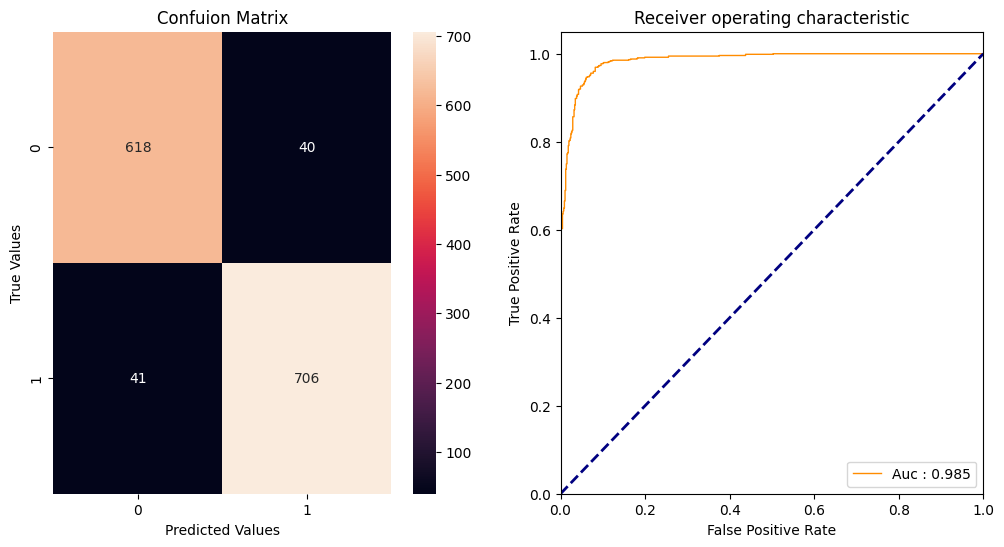

In [66]:
eval_metrics(churn_rf_optimal, X_test, y_test)

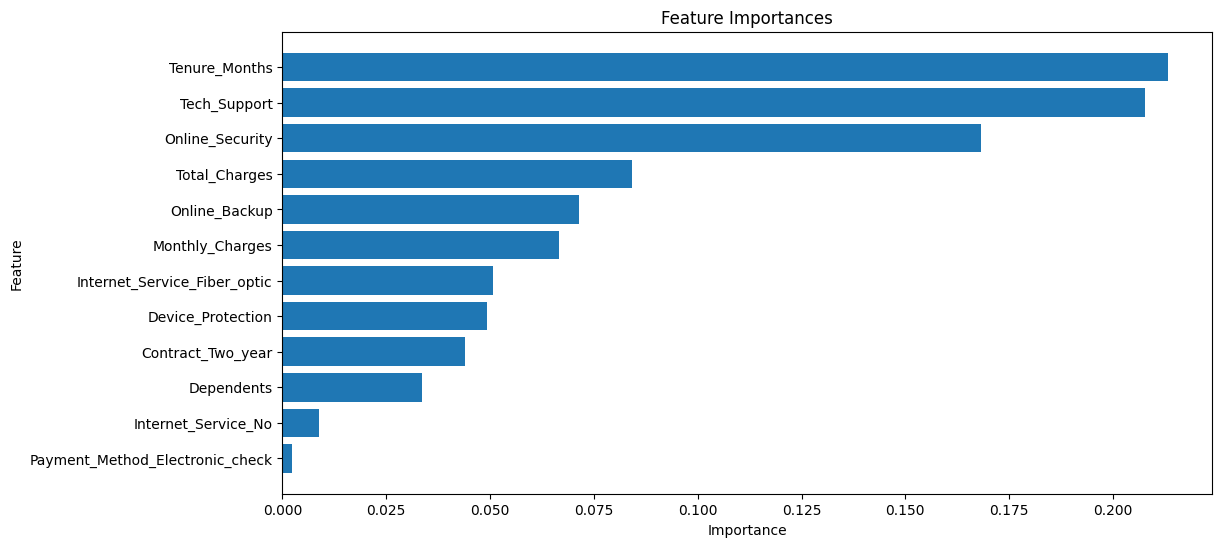

In [67]:
# understanding feature importance for this model
importances = churn_rf_optimal.feature_importances_

feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=True)


plt.figure(figsize=(12, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

### XGBoost

In [68]:
xgb_grid_params = {'max_depth': [3,4,5, 6],
                 'learning_rate': [0.01, 0.05, 0.1, 0.2],
                 'gamma': [0, 0.25, 0.5, 0.75],
                 'reg_lambda': [0, 5, 10, 15],
                 'scale_pos_weight': [3,5,7]
                }

xgb_model = xgb.XGBClassifier(objective='binary:logistic', seed=42)
xgb_grid = gridsearchcv(xgb_model, xgb_grid_params, 'roc_auc')

print('Best Params: ', xgb_grid.best_params_)
print('Best Score: ', xgb_grid.best_score_)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best Params:  {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'reg_lambda': 0, 'scale_pos_weight': 7}
Best Score:  0.9891557909743677


In [69]:
best_params = xgb_grid.best_params_
churn_xgb_optimal = xgb.XGBClassifier(objective='binary:logistic', learning_rate=best_params['learning_rate'],
                                      max_depth=best_params['max_depth'], reg_lambda=best_params['reg_lambda'],
                                      gamma=best_params['gamma'], scale_pos_weight=best_params['scale_pos_weight'],
                                      seed= 42)

churn_xgb_optimal.fit(X_train, y_train,
                     early_stopping_rounds=10,
                     eval_metric='aucpr',
                     eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.92631
[1]	validation_0-aucpr:0.96952
[2]	validation_0-aucpr:0.96984
[3]	validation_0-aucpr:0.97359
[4]	validation_0-aucpr:0.97315
[5]	validation_0-aucpr:0.97929
[6]	validation_0-aucpr:0.98077
[7]	validation_0-aucpr:0.98108
[8]	validation_0-aucpr:0.98096
[9]	validation_0-aucpr:0.98414
[10]	validation_0-aucpr:0.98485
[11]	validation_0-aucpr:0.98513
[12]	validation_0-aucpr:0.98500
[13]	validation_0-aucpr:0.98529
[14]	validation_0-aucpr:0.98510
[15]	validation_0-aucpr:0.98537
[16]	validation_0-aucpr:0.98643
[17]	validation_0-aucpr:0.98626
[18]	validation_0-aucpr:0.98648
[19]	validation_0-aucpr:0.98650
[20]	validation_0-aucpr:0.98648
[21]	validation_0-aucpr:0.98707
[22]	validation_0-aucpr:0.98716
[23]	validation_0-aucpr:0.98718
[24]	validation_0-aucpr:0.98738
[25]	validation_0-aucpr:0.98755
[26]	validation_0-aucpr:0.98729
[27]	validation_0-aucpr:0.98761
[28]	validation_0-aucpr:0.98769
[29]	validation_0-aucpr:0.98773
[30]	validation_0-aucpr:0.98769
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Precision:  0.9219143576826196
Recall:  0.9799196787148594
F1 Score:  0.9500324464633355
ROC AUC Score:  0.9896495811004912


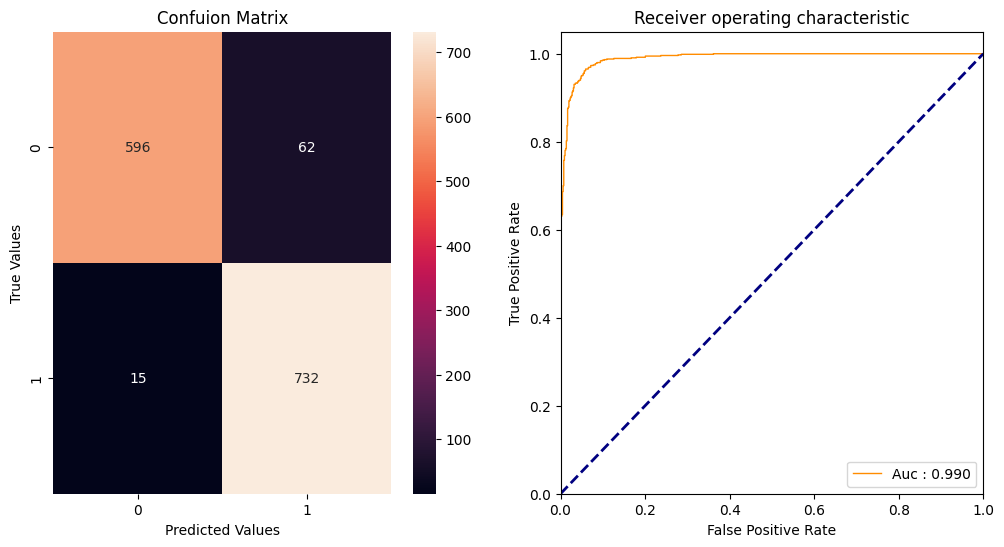

In [70]:
eval_metrics(churn_xgb_optimal, X_test, y_test)

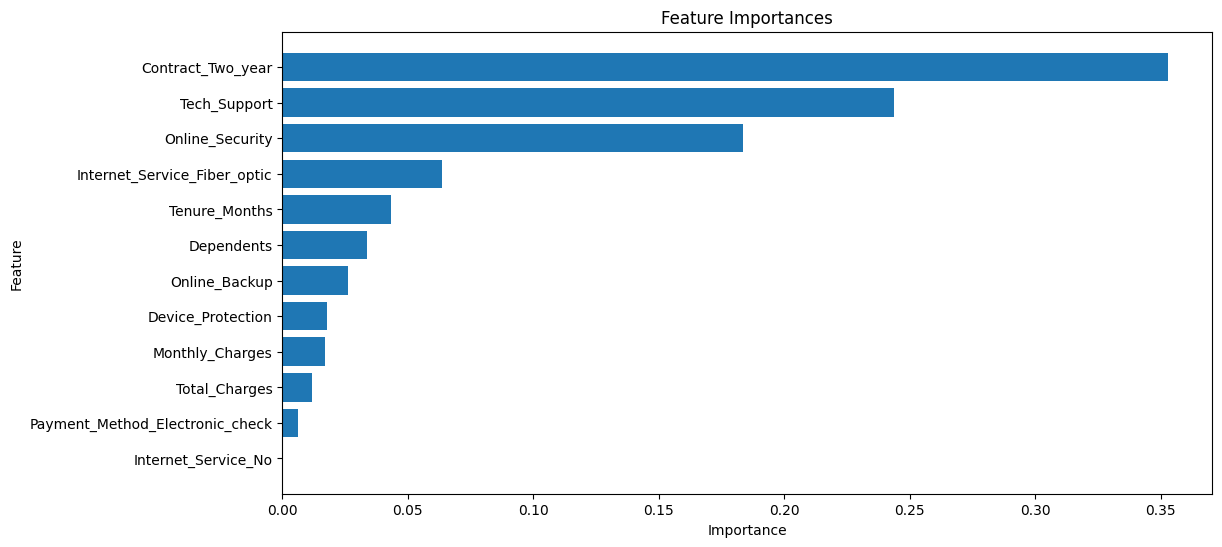

In [71]:
# understanding feature importance for this model
importances = churn_xgb_optimal.feature_importances_

feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=True)


plt.figure(figsize=(12, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [72]:
import pickle
pickle.dump(churn_xgb_optimal, open('churn_xgb_optimal.pkl','wb'))